# Tienda de videojuegos ICE


Objetivo: identificar patrones que determinen si un juego tiene éxito o no

## Lectura y visualización del DataSET

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [74]:
df=pd.read_csv('/datasets/games.csv')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [76]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Modificación y limpieza de los datos

### Cambio de nombre de las columnas a minusculas

In [77]:
#Se procede a cambiar todos los nombres de las columnas a minusculas
import pandas as pd

new_column=[]

for column in df.columns:
    modified_columns=column.strip().lower()
    new_column.append(modified_columns)

df.columns=new_column

df.columns


Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [78]:
df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
9441,DreamWorks Super Star Kartz,Wii,2011.0,Racing,0.08,0.03,0.00,0.01,NaN,tbd,E
12846,Titan Quest,PC,2006.0,Role-Playing,0.01,0.04,0.00,0.01,77.0,8.1,T
13808,Dragon's Lair 3D: Return to the Lair,GC,2002.0,Platform,0.03,0.01,0.00,0.00,NaN,NaN,NaN
7144,Time Crisis: Crisis Zone,PS2,2004.0,Shooter,0.11,0.09,0.00,0.03,66.0,tbd,T
6276,Mass Effect Trilogy,PC,2012.0,Action,0.09,0.16,0.00,0.02,NaN,8,M
7588,Ty the Tasmanian Tiger 2: Bush Rescue,GC,2004.0,Platform,0.15,0.04,0.00,0.01,70.0,8.6,E
1918,Prince of Persia,PS3,2008.0,Action,0.47,0.40,0.03,0.17,85.0,7.3,T
15210,Atelier Firis: The Alchemist of the Mysterious...,PSV,2016.0,Role-Playing,0.00,0.00,0.02,0.00,NaN,NaN,NaN
6219,SimCity 2000,SAT,1994.0,Simulation,0.00,0.00,0.28,0.00,NaN,NaN,NaN
11933,Speed Zone,Wii,2009.0,Racing,0.01,0.05,0.00,0.01,37.0,3.8,E


In [79]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Valores Ausentes


Para poder cambiar los tipos de datos de los años, es necesario primero verificar los espacios en blanco de cada columna


In [80]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

#### Columna 'Year of release'

In [81]:
df['year_of_release'].max()

2016.0

In [82]:
df['year_of_release'].min()

1980.0

Se van a rellenar los valores ausentes para la columna de año de lanzamiento con el valor 0, porque es un valor que nos permite identificar facilmente los valores que son ausentes y ademas nos permita operar con los datos.

In [83]:
df['year_of_release'].median()

2007.0

In [84]:
#Se rellenan los valores ausentes de los años con 0, esto nos permite identificar la cantidad de datos que estan en este rango
df['year_of_release']=df['year_of_release'].fillna(0)

In [85]:
df['year_of_release']=df['year_of_release'].astype('int')
df['year_of_release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16715, dtype: int64

In [86]:
df.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [87]:
df.query('year_of_release==0').count()

name               269
platform           269
year_of_release    269
genre              269
na_sales           269
eu_sales           269
jp_sales           269
other_sales        269
critic_score       154
user_score         175
rating             181
dtype: int64

#### Columna 'Critic Score'

Se va a determinar la media para cada plataforma y se va a rellenar el valor ausente de la columna 'Critic score' con la mediana de cada plataforma. Esto porque en datos sesgados, con valores atipicos se hace mejor trabajar con la mediana

In [88]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [89]:
df.groupby('platform')['critic_score'].mean()

platform
2600          NaN
3DO           NaN
3DS     67.101190
DC      87.357143
DS      63.761506
GB            NaN
GBA     67.372146
GC      69.488839
GEN           NaN
GG            NaN
N64           NaN
NES           NaN
NG            NaN
PC      75.928671
PCFX          NaN
PS      71.515000
PS2     68.727273
PS3     70.382927
PS4     72.091270
PSP     67.424242
PSV     70.791667
SAT           NaN
SCD           NaN
SNES          NaN
TG16          NaN
WS            NaN
Wii     62.823932
WiiU    70.733333
X360    68.616812
XB      69.859310
XOne    73.325444
Name: critic_score, dtype: float64

Como las medias de las plataformas son muy parecidas, se ha decidido rellenar los valores ausentes para la columna 'critic_score' con la media global 

In [90]:
df['critic_score']=df['critic_score'].fillna(df['critic_score'].median())

df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2633,Torneko no Daibouken: Fushigi no Dungeon,SNES,1993,Role-Playing,0.00,0.00,0.78,0.00,71.0,NaN,NaN
15915,Ore wa Shoujo Mangaka,PSP,2012,Action,0.00,0.00,0.02,0.00,71.0,NaN,NaN
12878,Chocolatier,DS,2010,Misc,0.05,0.00,0.00,0.00,71.0,tbd,E
9744,Rock Band Track Pack Volume 2,PS2,2008,Misc,0.06,0.05,0.00,0.02,71.0,tbd,T
15949,Gaist Crusher God,3DS,2014,Action,0.00,0.00,0.02,0.00,71.0,NaN,NaN
12598,Fate/Tiger Colosseum Upper,PSP,2008,Fighting,0.00,0.00,0.06,0.00,71.0,NaN,NaN
14398,Rampo,SAT,1995,Adventure,0.00,0.00,0.03,0.00,71.0,NaN,NaN
6461,J Stars Victory Vs.,PS4,2015,Fighting,0.08,0.14,0.00,0.04,71.0,NaN,NaN
5358,Mini Ninjas,PS3,2009,Action,0.14,0.15,0.00,0.06,73.0,8.7,E10+
148,Final Fantasy XII,PS2,2006,Role-Playing,1.88,0.00,2.33,1.74,92.0,7.6,T


In [91]:
df['critic_score'].isna().sum()

0

#### Columna 'User Score'

In [92]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Se observan valores ausentes(nan) y tambien filas con valores 'tbd', vamos a analizar cada caso para elegir con que valores rellenar estos campos.

In [93]:
df['user_score'].describe()

count     10014
unique       96
top         tbd
freq       2424
Name: user_score, dtype: object

In [94]:
df.query("user_score=='tbd'")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,71.0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,71.0,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,71.0,tbd,E


Tomando la misma logica que para la columna critic_score, los valores maximos que se pueden tener en la columna user_score es de 0-10, por lo que se van a reemplazar los valores ausentes y el tbd por la mediana de los valores. Por ultimo se va a cambiar la columna a tipo float con el fin de poder realizar calculos posteriores.

In [95]:
#Se cambia el tipo de datos de str a numerico
df['user_score']=pd.to_numeric(df['user_score'], errors='coerce')

df['user_score']

0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16715, dtype: float64

In [96]:
df['user_score'].mean()

7.125046113306982

In [97]:
df.groupby('platform')['user_score'].mean()

platform
2600         NaN
3DO          NaN
3DS     6.831609
DC      8.528571
DS      7.025194
GB           NaN
GBA     7.676863
GC      7.597541
GEN          NaN
GG           NaN
N64          NaN
NES          NaN
NG           NaN
PC      7.062468
PCFX         NaN
PS      7.865432
PS2     7.626833
PS3     6.726568
PS4     6.748249
PSP     7.228266
PSV     7.336364
SAT          NaN
SCD          NaN
SNES         NaN
TG16         NaN
WS           NaN
Wii     6.742679
WiiU    6.904000
X360    6.683540
XB      7.500512
XOne    6.521429
Name: user_score, dtype: float64

In [98]:
#Se cambian los datos ausentes por la media global para essa columna

df['user_score']=df['user_score'].fillna(df['user_score'].median())

df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1906,Ready 2 Rumble Boxing,PS,1998,Sports,0.60,0.41,0.00,0.07,71.0,7.5,NaN
8706,Just Sing!,DS,2009,Misc,0.14,0.00,0.00,0.01,71.0,7.5,NaN
12747,Bleach: Blade Battlers 2nd,PS2,2007,Fighting,0.00,0.00,0.06,0.00,71.0,7.5,NaN
6776,Tongari Boushi to Oshare na Mahou Tsukai,DS,2011,Action,0.00,0.00,0.24,0.00,71.0,7.5,NaN
15268,Grey's Anatomy: The Video Game,PC,2009,Adventure,0.00,0.02,0.00,0.00,36.0,3.9,T
10555,Dark Summit,XB,2001,Sports,0.08,0.02,0.00,0.00,71.0,7.5,T
12571,Smile PreCure! Let's Go! Marchen World,3DS,2012,Action,0.00,0.00,0.06,0.00,71.0,7.5,NaN
9534,Monster Hunter Frontier Online,X360,2010,Role-Playing,0.00,0.00,0.13,0.00,71.0,7.5,NaN
11922,The Croods: Prehistoric Party!,Wii,2013,Misc,0.01,0.05,0.00,0.00,71.0,7.5,NaN
16392,Goat Simulator,XOne,2016,Simulation,0.00,0.01,0.00,0.00,53.0,6.3,T


In [99]:
df['user_score'].isna().sum()

0

In [100]:
# Se verifican los valores ausentes y el tipo de dato para cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### Columna 'Rating'

Los valores ausentes se van a reemplazar por 'unknown'dado que no podemos definir un rating para cada juego porque depende del contenido del mismo, puede haber contenido violento, grosero, etc.. y por eso no podemos definir si es o no apto para determinada edad, por esa razon, dejaremos 'unknown'

In [101]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [102]:
df['rating']=df['rating'].fillna('unknown')


df['rating']

0              E
1        unknown
2              E
3              E
4        unknown
          ...   
16710    unknown
16711    unknown
16712    unknown
16713    unknown
16714    unknown
Name: rating, Length: 16715, dtype: object

In [103]:
df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2594,WCW Mayhem,N64,1999,Fighting,0.63,0.15,0.00,0.01,71.0,7.5,unknown
2646,MadWorld,Wii,2009,Action,0.45,0.23,0.02,0.07,81.0,8.6,M
3817,Tales of Symphonia,PS3,2013,Role-Playing,0.21,0.12,0.13,0.07,71.0,7.2,T
7142,Hatsune Miku: Project Mirai 2,3DS,2013,Action,0.00,0.00,0.22,0.00,71.0,7.5,unknown
8569,SimEarth: The Living Planet,SNES,1991,Simulation,0.00,0.00,0.16,0.00,71.0,7.5,unknown
8853,Burger Island,Wii,2009,Action,0.14,0.00,0.00,0.01,71.0,7.5,E
5231,Tiger Woods PGA Tour 09,PSP,2008,Sports,0.07,0.18,0.00,0.10,53.0,5.5,E
14267,Medabots 9: Metabee / Rokusho,3DS,2015,Role-Playing,0.00,0.00,0.03,0.00,71.0,7.5,unknown
11824,World Party Games,Wii,2009,Misc,0.07,0.00,0.00,0.01,71.0,7.5,E
6706,Kung Fu Panda 2,X360,2011,Action,0.16,0.06,0.00,0.02,71.0,7.5,unknown


### Ingenieria de caracteristicas

Se va a crear una nueva columna que representa el total de lass ventas para cada video juego, de esta manera, se sumaran las ventas de las 3 regiones.


In [104]:
df['total_purchase']=df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']

df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_purchase
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,unknown,31.38


## Análisis de los Datos

### Lanzamiento de los videojuegos por año

In [105]:
df_year=df.groupby('year_of_release')['name'].count().reset_index(name='number_of_games')

df_year

,year_of_release,number_of_games
0,0,269
1,1980,9
2,1981,46
3,1982,36
4,1983,17
5,1984,14
6,1985,14
7,1986,21
8,1987,16
9,1988,15


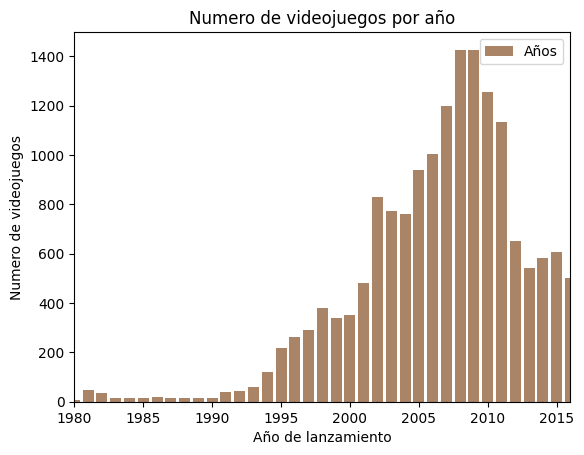

In [106]:
plt.bar(df_year['year_of_release'],df_year['number_of_games'], color='#a98467', label='Años')

plt.xlim(1980, 2016)
plt.xlabel("Año de lanzamiento")
plt.ylabel("Numero de videojuegos")
plt.title("Numero de videojuegos por año")
plt.legend()
plt.show()

En la grafica anterior, se observa que los videojuegos empiezan a tener mas popularidad y a lanzar mas videojuegos hacia el año 2000, con un auge entre el 2005 y 2010

### Total de venta por año

Queremos identificar si el comportamiento de la venta total por año tiene el mismo comportamiento del grafico anterior, con esto, podemos limitar mas los datos y poder buscar un patron de exito mas certero.

In [107]:
df_purchase_year=df.groupby('year_of_release')['total_purchase'].sum().reset_index(name='purchase_year')

df_purchase_year

,year_of_release,purchase_year
0,0,98.92
1,1980,11.38
2,1981,35.68
3,1982,28.88
4,1983,16.80
5,1984,50.35
6,1985,53.95
7,1986,37.08
8,1987,21.70
9,1988,47.21


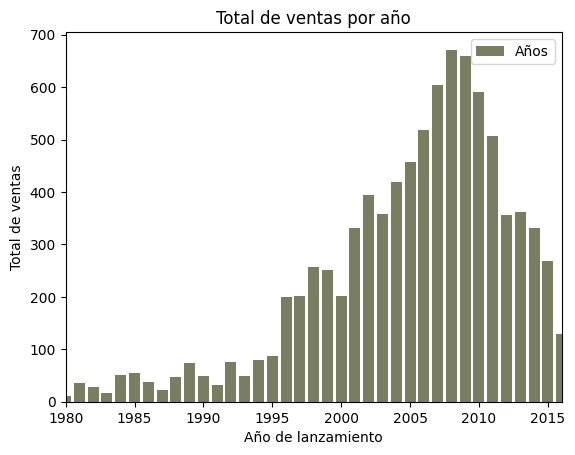

In [108]:
plt.bar(df_purchase_year['year_of_release'],df_purchase_year['purchase_year'], color='#797d62', label='Años')

plt.xlim(1980, 2016)
plt.xlabel("Año de lanzamiento")
plt.ylabel("Total de ventas")
plt.title("Total de ventas por año")
plt.legend()
plt.show()

Como era de suponer, el comportamiento en terminos de ventas es muy parecido al de cantidad de videojuegos lanzados por año. De esta forma, para tener un patron mas acertado, solamente vamos a tener en cuenta de aqui en adelante los datos recopilados desde el año 2000 en adelante

### Plataformas que mas venden

In [109]:
df_2000=df.query('year_of_release>=2000')
df_2000

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_purchase
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,7.5,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,71.0,7.5,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,7.5,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,71.0,7.5,unknown,0.01


In [110]:
df_platform=df_2000.groupby('platform')['total_purchase'].sum().reset_index(name='purchase_platform')
df_platform=df_platform.sort_values(by='purchase_platform', ascending=False)
df_platform

,platform,purchase_platform
9,PS2,1233.56
17,X360,961.24
10,PS3,931.34
15,Wii,891.18
2,DS,802.76
11,PS4,314.14
4,GBA,312.88
12,PSP,289.53
0,3DS,257.81
18,XB,251.57


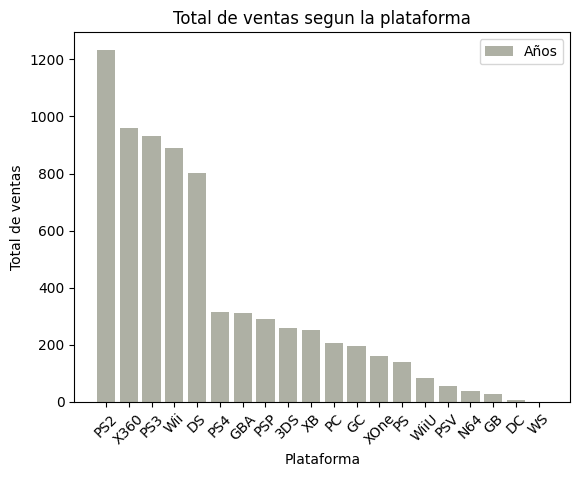

In [111]:
plt.bar(df_platform['platform'],df_platform['purchase_platform'], color='#aeb0a4', label='Años')


plt.xlabel("Plataforma")
plt.ylabel("Total de ventas")
plt.title("Total de ventas segun la plataforma")
plt.xticks(rotation=45)
plt.legend()
plt.show()

Se evidencia que las plataformas que tienen mayor cantidad de ventas son PS2, X360, Wii, PS3 y DS, las demas plataformas no tienen mayor acogida.

### Ventas de cada plataforma por año

Queremos saber cómo ha sido el comportamiendo de las plataformas desde su año de lanzamiento hasta el último registro que tenemos. Por eso, vamos a graficar como se han comportado las ventas para cada una segun los años

In [112]:
df_platform_year=df_2000.groupby(['platform', 'year_of_release'])['total_purchase'].sum().reset_index(name='purchase_platform_year')

df_platform_year

,platform,year_of_release,purchase_platform_year
0,3DS,2011,63.20
1,3DS,2012,51.36
2,3DS,2013,56.57
3,3DS,2014,43.76
4,3DS,2015,27.78
...,...,...,...
145,XB,2008,0.18
146,XOne,2013,18.96
147,XOne,2014,54.07
148,XOne,2015,60.14


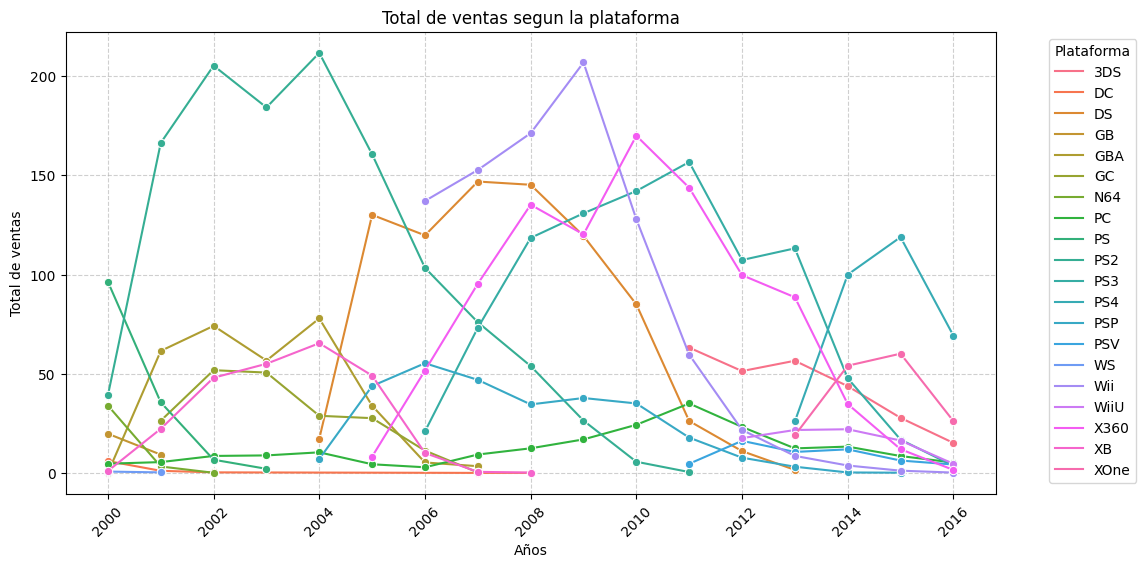

In [113]:
import seaborn as sns

plt.figure(figsize=(12,6))

sns.lineplot(data=df_platform_year, x="year_of_release", y="purchase_platform_year", hue= "platform", marker="o") 


plt.xlabel("Años")
plt.ylabel("Total de ventas")
plt.title("Total de ventas segun la plataforma")
plt.xticks(rotation=45)
plt.legend(title="Plataforma", bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

En el grafico se evidencia que hubo plataformas que a medida del tiempo dejaron de tener ganancias y se descontinuaron, de hecho, se observa que no hay ninguna platafroma actual que este mostrando una tendencia hacia arriba, las ventas se han ido bajando con los años.

Adicional, se puede observar que las plataformas que mas acogida han tenido, tienden a tener un auge de 3 años y luego comienzan a bajar sus ventas. y su participacion en el mercado tiene un periodo aprox de 10 años

### Plataformas vigentes del 2013 en adelante

Para visualizar la tendencia un poco mejor, vamos a verificar las plataformas vigentes desde el 2013 al 2016.

In [114]:
df_2013=df.query('year_of_release>=2013')
df_2013

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_purchase
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,71.0,7.5,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,71.0,7.5,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,7.5,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,71.0,7.5,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,7.5,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,7.5,unknown,0.01


In [115]:
df_platform_year_2013=df_2013.groupby(['platform', 'year_of_release'])['total_purchase'].sum().reset_index(name='purchase_platform_year')

df_platform_year_2013

,platform,year_of_release,purchase_platform_year
0,3DS,2013,56.57
1,3DS,2014,43.76
2,3DS,2015,27.78
3,3DS,2016,15.14
4,DS,2013,1.54
5,PC,2013,12.38
6,PC,2014,13.28
7,PC,2015,8.52
8,PC,2016,5.25
9,PS3,2013,113.25


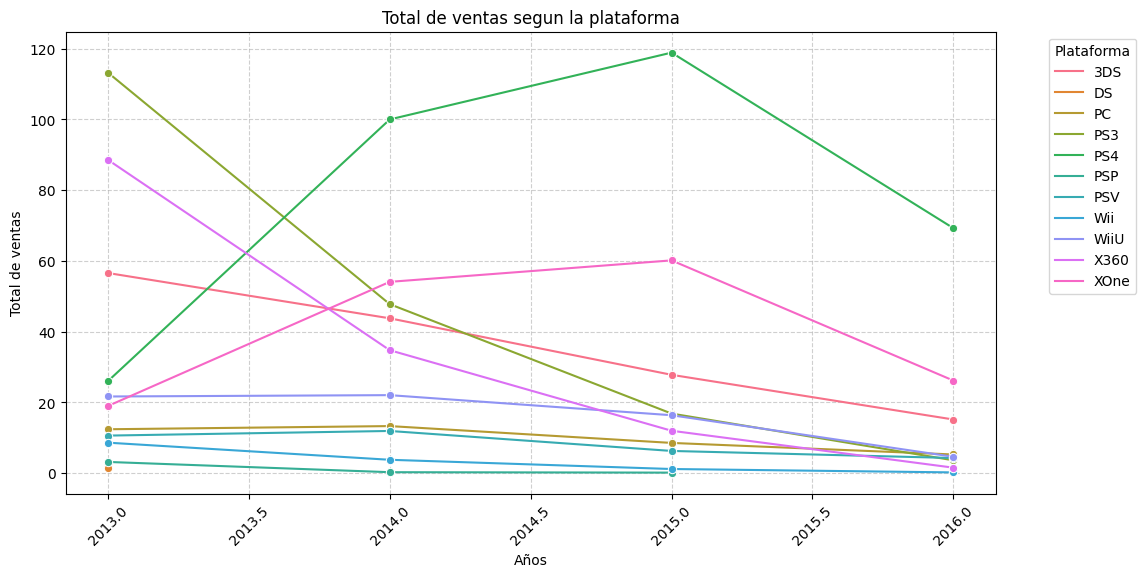

In [116]:
import seaborn as sns

plt.figure(figsize=(12,6))

sns.lineplot(data=df_platform_year_2013, x="year_of_release", y="purchase_platform_year", hue= "platform", marker="o") 


plt.xlabel("Años")
plt.ylabel("Total de ventas")
plt.title("Total de ventas segun la plataforma")
plt.xticks(rotation=45)
plt.legend(title="Plataforma", bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

Se evidencia que plataformas que generaron muchas ganancias, con el paso del tiempo desaparecieron, como el caso de PS2, que inicialmente muestra que es la que mas ganancias ha recaudado, pero que al ver el paso del tiempo dejó de tener participación en el mercado

Por otro lado, se evidencia un periodo importante, que fue el 2014, donde se ve que la gran mayoria de las plataformas tiene una caida importate o salida del mercado, pero que, 2 de ellas por el contrario tienen mejor acogida, que son PS4 y XOne. Sin embargo, para el año 2015 se ve que todas las plataformas vigentes siguen teniendo una tendencia a bajar el numero de las ventas

### Top 5 de plataformas que mas han vendido en los ultimos 3 años

In [117]:
df_platform_since_2013=df_2013.groupby('platform')['total_purchase'].sum().reset_index(name='purchase_platform')

df_platform_since_2013=df_platform_since_2013.sort_values(by='purchase_platform', ascending=False).head()

df_platform_since_2013

,platform,purchase_platform
4,PS4,314.14
3,PS3,181.43
10,XOne,159.32
0,3DS,143.25
9,X360,136.80


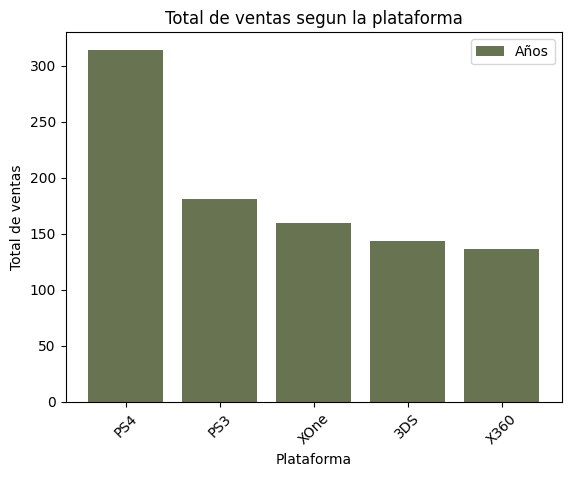

In [118]:
plt.bar(df_platform_since_2013['platform'],df_platform_since_2013['purchase_platform'], color='#687351', label='Años')


plt.xlabel("Plataforma")
plt.ylabel("Total de ventas")
plt.title("Total de ventas segun la plataforma")
plt.xticks(rotation=45)
plt.legend()
plt.show()

La plataforma PS4 lleva una ventaja casi que por el doble de ventas que las otras plataformas para los ultimos 3 años. No obstante, es necesario tener en cuenta que aunque la plataforma PS2 ya no esta en auge, sus ventas superan a todas las plataformas y a la PS4 por mas de tres veces 

### Diagrama de caja para el top 5 de plataformas de las ventas de los ultimos 3 años

In [119]:
df_platform_year_2013=df_platform_year_2013.sort_values(by='year_of_release', ascending=True)
df_platform_year_2013_pt=df_platform_year_2013.pivot_table(index='year_of_release', columns='platform', values='purchase_platform_year')
df_platform_year_2013_pt

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


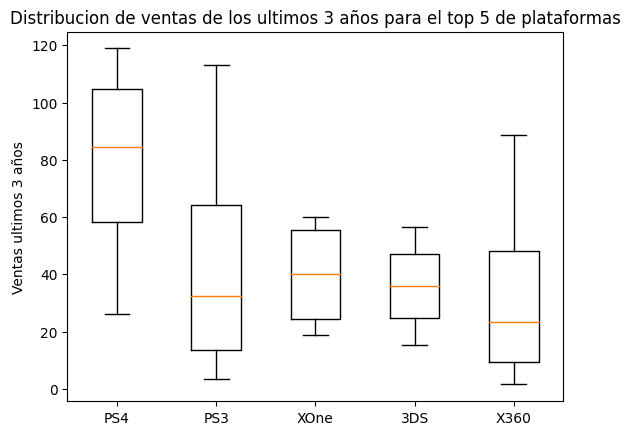

In [120]:

plt.boxplot([df_platform_year_2013_pt['PS4'],
             df_platform_year_2013_pt['PS3'],
             df_platform_year_2013_pt['XOne'],
             df_platform_year_2013_pt['3DS'],
             df_platform_year_2013_pt['X360']], labels=['PS4','PS3','XOne','3DS','X360'])


plt.title('Distribucion de ventas de los ultimos 3 años para el top 5 de plataformas')
plt.ylabel('Ventas ultimos 3 años')
             
plt.show()

Se evidencia que la mediana para todas las plataformas ha sido diferente,lo que indica la variabilidad de sus ventas, excepto para Xone y 3DS que han tenido un comportamiento parecido. Se observa tambien que la plataforma PS3 ha tenido valores maximos mas alejados de su mediana, lo que indica que ha tenido picos de ventas, mientras que la plataforma PS4 tiene valores consistentes. 3DS tiene una distribucion mas compacta, lo que significa una menor variabilidad en las ventas

### Cómo se han afectado las ventas según las calificaciones

Se va a elegir la plataforma que mas ventas ha tenido en los ultimos 3 años para verificar cómo han afectado las calificaciones.

In [121]:
df_rating=df_2013.query("platform=='PS4'")
df_rating

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_purchase
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,71.0,7.5,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,71.0,7.5,unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,unknown,0.01
16503,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,71.0,7.5,unknown,0.01
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16530,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


In [122]:
df_rating_PS4=df_rating.groupby('year_of_release')['critic_score'].mean().reset_index(name='mean_critic_score')
df_rating_PS4

,year_of_release,mean_critic_score
0,2013,70.937500
1,2014,72.480000
2,2015,71.722628
3,2016,71.402439


In [123]:
df_rating_PS4_user=df_rating.groupby('year_of_release')['user_score'].mean().reset_index(name='mean_user_score')
df_rating_PS4_user

,year_of_release,mean_user_score
0,2013,5.587500
1,2014,6.973333
2,2015,7.062774
3,2016,7.114634


Al parecer, las calificaciones de los usuarios han mejorado con los años, no de manera significativa, pero si han mejorado, entonces no podriamos concluir que se han bajado las ventas por la percepcion de los usuarios sobre la plataforma

### Qué juegos han tenido las mejores calificaciones en los ultimos 3 años 

In [124]:
df_best_games=df_2013.sort_values(by='critic_score', ascending=False)
df_best_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_purchase
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
1730,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.00,0.09,96.0,7.9,M,1.17
...,...,...,...,...,...,...,...,...,...,...,...,...
7790,Fighter Within,XOne,2013,Fighting,0.11,0.07,0.00,0.02,23.0,3.0,T,0.20
11222,Rugby 15,XOne,2015,Sports,0.03,0.05,0.00,0.01,20.0,3.1,E,0.09
12822,Ride to Hell,X360,2013,Racing,0.04,0.01,0.00,0.01,19.0,1.3,M,0.06
10015,Rugby 15,PS4,2015,Sports,0.04,0.06,0.00,0.02,19.0,3.4,E,0.12


In [125]:
#Mejores juegos segun el critic_score

df_best_games=df_2013.groupby('name')['critic_score'].mean().reset_index(name='mean_critic_score')
df_best_games=df_best_games.sort_values(by='mean_critic_score', ascending=False)
df_best_games.head(10)

,name,mean_critic_score
430,Grand Theft Auto V,96.800000
114,BioShock Infinite,93.666667
655,Metal Gear Solid: The Legacy Collection,93.000000
1010,Super Mario 3D World,93.000000
1174,Uncharted 4: A Thief's End,93.000000
122,Bloodborne,92.000000
1114,The Witcher 3: Wild Hunt,92.000000
374,Forza Horizon 3,91.000000
1091,The Legend of Zelda: A Link Between Worlds,91.000000
106,Bayonetta 2,91.000000


In [126]:
#Mejores juegos segun el user_score
df_best_games_user=df_2013.groupby('name')['user_score'].mean().reset_index(name='mean_user_score')
df_best_games_user=df_best_games_user.sort_values(by='mean_user_score', ascending=False)
df_best_games_user.head(10)

,name,mean_user_score
1114,The Witcher 3: Wild Hunt,9.233333
987,Steins;Gate,9.200000
633,Mario Kart 8,9.100000
655,Metal Gear Solid: The Legacy Collection,9.000000
786,Phoenix Wright: Ace Attorney Trilogy,9.000000
1092,The Legend of Zelda: Majora's Mask 3D,9.000000
1010,Super Mario 3D World,9.000000
261,Donkey Kong Country: Tropical Freeze,8.900000
158,Cities: Skylines,8.900000
1228,Xenoblade Chronicles X,8.900000


In [127]:
# Los 10 juegos que mas ventas tuvieron

df_best_games_purchase=df_2013.groupby(['name', 'platform','critic_score','user_score', 'rating','genre'])['total_purchase'].mean().reset_index(name='total_purchase')
df_best_games_purchase=df_best_games_purchase.sort_values(by='total_purchase', ascending=False).head(10)
df_best_games_purchase

,name,platform,critic_score,user_score,rating,genre,total_purchase
748,Grand Theft Auto V,PS3,97.0,8.2,M,Action,21.05
750,Grand Theft Auto V,X360,97.0,8.1,M,Action,16.27
254,Call of Duty: Black Ops 3,PS4,71.0,7.5,unknown,Shooter,14.63
1402,Pokemon X/Pokemon Y,3DS,71.0,7.5,unknown,Role-Playing,14.60
749,Grand Theft Auto V,PS4,97.0,8.3,M,Action,12.62
1398,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,71.0,7.5,unknown,Role-Playing,11.68
261,Call of Duty: Ghosts,X360,73.0,2.6,M,Shooter,10.24
258,Call of Duty: Ghosts,PS3,71.0,2.6,M,Shooter,9.36
1167,Minecraft,X360,71.0,7.5,unknown,Misc,9.18
606,FIFA 16,PS4,82.0,4.3,E,Sports,8.58


Como se puede ver en la tabla, las calificaciones no estan directamente relacionadas con la cantidad de ventas, dado que hay juegos que tienen mejores calificaciones y no han presentado grandes volumenes de ventas, sin embargo, lo confirmaremos graficando los datos y obteniendo la correlacion. El juego que mas destaca por su puntaje y las ventas que ha tenido es Grand Theft Auto V.

### Grafico de dispersion entre las calificaciones y las ventas

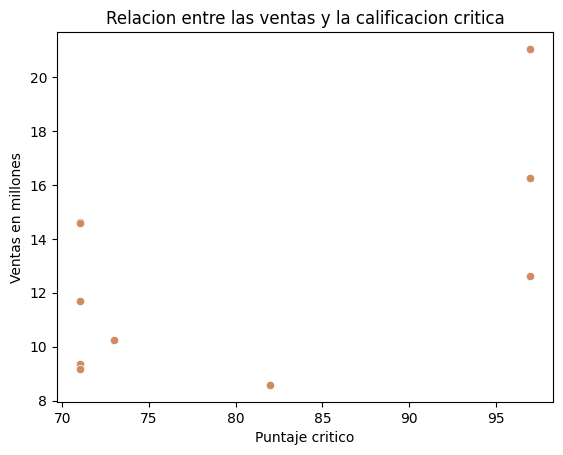

In [128]:
import seaborn as sns


sns.scatterplot(x=df_best_games_purchase['critic_score'],y=df_best_games_purchase['total_purchase'], color='#d08c60')
plt.xlabel('Puntaje critico')
plt.ylabel('Ventas en millones')
plt.title('Relacion entre las ventas y la calificacion critica')
plt.show()


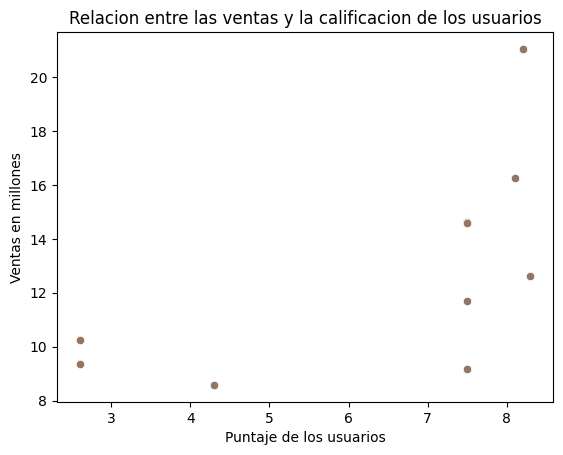

In [129]:
import seaborn as sns


sns.scatterplot(x=df_best_games_purchase['user_score'],y=df_best_games_purchase['total_purchase'], color='#937662')
plt.xlabel('Puntaje de los usuarios')
plt.ylabel('Ventas en millones')
plt.title('Relacion entre las ventas y la calificacion de los usuarios')
plt.show()


In [130]:
correlacion_critic=df_best_games_purchase[['critic_score','total_purchase']].corr()
correlacion_user=df_best_games_purchase[['user_score','total_purchase']].corr()

print(f'Correlacion de las calificaciones criticas y las ventas', correlacion_critic)

print(f'Correlacion de las calificaciones de los usuarios y las ventas', correlacion_user)

Correlacion de las calificaciones criticas y las ventas                 critic_score  total_purchase
critic_score        1.000000        0.578212
total_purchase      0.578212        1.000000
Correlacion de las calificaciones de los usuarios y las ventas                 user_score  total_purchase
user_score         1.00000         0.62724
total_purchase     0.62724         1.00000


Confirmando lo observado en la tabla, las graficas nos muestran que la dispersion de los datos no tiende a ser lineal ni a tener una forma en especifico, por lo que no podemos asegurar que las calificaciones son directamente proporcionales al volumen de ventas, su correlacion es 0.5 y 0.6 para las dos calificaciones, al estar lejos del valor 1, corroboramos la no linealidad de los datos.

### Los 10 juegos que menos ventas han recibido

In [131]:
df_worst_games_purchase=df_2013.groupby(['name', 'platform','critic_score','user_score', 'rating','genre'])['total_purchase'].mean().reset_index(name='total_purchase')
df_worst_games_purchase=df_worst_games_purchase.sort_values(by='total_purchase', ascending=True).head(10)
df_worst_games_purchase

,name,platform,critic_score,user_score,rating,genre,total_purchase
1116,Mark McMorris Infinite Air,XOne,71.0,7.1,T,Sports,0.01
1455,Prototype: Biohazard Bundle,XOne,56.0,3.1,M,Action,0.01
1457,Psycho-Pass,XOne,71.0,7.5,unknown,Adventure,0.01
274,Cartoon Network Battle Crashers,3DS,71.0,7.5,E10+,Action,0.01
272,Carmageddon: Max Damage,PS4,51.0,5.5,M,Action,0.01
1470,Quantum Break,PC,66.0,4.3,M,Action,0.01
1472,R.B.I. Baseball 2016,PS4,71.0,7.5,unknown,Sports,0.01
1454,Prototype: Biohazard Bundle,PS4,48.0,2.0,M,Action,0.01
1475,Rabbids Invasion: The Interactive TV Show,PS4,71.0,7.5,unknown,Misc,0.01
1483,Raven's Cry,PS4,71.0,7.5,unknown,Role-Playing,0.01


En cuanto al genero de los juegos, se observa que tanto los 10 mejores como los 10 peores tienen generos de accion, y de roles, sin embargo, categorias como deportes y disparos no se encuentra en ambos listados.

### Análisis por región 

#### Región NA 

In [132]:
df_2013_na=df_2013.groupby("platform")['na_sales'].mean().reset_index(name='mean_sales')
df_2013_na=df_2013_na.sort_values(by='mean_sales', ascending=False).head()
df_2013_na

,platform,mean_sales
9,X360,0.439032
10,XOne,0.377004
7,Wii,0.285217
4,PS4,0.277398
8,WiiU,0.254000


#### Región EU 

In [133]:
df_2013_eu=df_2013.groupby("platform")['eu_sales'].mean().reset_index(name='mean_sales')
df_2013_eu=df_2013_eu.sort_values(by='mean_sales', ascending=False).head()
df_2013_eu

,platform,mean_sales
4,PS4,0.359923
7,Wii,0.257826
9,X360,0.228602
10,XOne,0.208866
3,PS3,0.196551


#### Región JP 

In [134]:
df_2013_jp=df_2013.groupby("platform")['jp_sales'].mean().reset_index(name='mean_sales')
df_2013_jp=df_2013_jp.sort_values(by='mean_sales', ascending=False).head()
df_2013_jp

,platform,mean_sales
0,3DS,0.223795
8,WiiU,0.094609
3,PS3,0.067681
6,PSV,0.051927
5,PSP,0.049104


Como se puede ver, las 5 plataformas que mas han generado ingresos varian para cada region. La region que mas ingresos ha presentado es la region de Norte America, despues le sigue la región de Europa y finalmente Japon

### Género por región

In [135]:
df_2013_genre=df_2013.groupby('genre')[['na_sales','eu_sales','jp_sales']].mean().reset_index()

df_2013_genre=df_2013_genre.rename(columns={'na_sales':'na','eu_sales':'eu','jp_sales':'jp'})
df_2013_genre

,genre,na,eu,jp
0,Action,0.164556,0.154217,0.052859
1,Adventure,0.029143,0.033673,0.023755
2,Fighting,0.194375,0.106875,0.095625
3,Misc,0.177355,0.129290,0.059355
4,Platform,0.245135,0.210541,0.064730
5,Puzzle,0.048824,0.058824,0.069412
6,Racing,0.152471,0.237529,0.027059
7,Role-Playing,0.158904,0.126610,0.174795
8,Shooter,0.586845,0.469840,0.035348
9,Simulation,0.078387,0.176129,0.072903


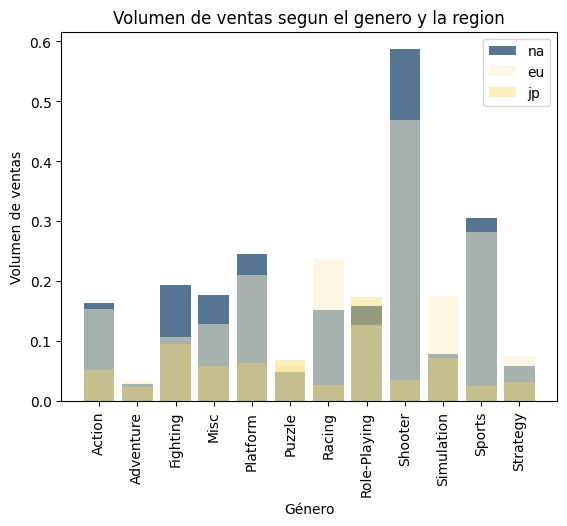

In [136]:
plt.bar(df_2013_genre['genre'], df_2013_genre['na'], alpha=0.7, color='#0d3b66', label='NA' )

plt.bar(df_2013_genre['genre'], df_2013_genre['eu'], alpha=0.5, color='#faf0ca', label='EU' )

plt.bar(df_2013_genre['genre'], df_2013_genre['jp'], alpha=0.4, color='#f4d35e', label='JP' )


plt.xlabel('Género')
plt.ylabel('Volumen de ventas')
plt.title('Volumen de ventas segun el genero y la region')
plt.legend(['na','eu','jp'])
plt.xticks(rotation=90)
plt.show()


Como se puede observar, para todas las regiones, el genero que mas factura es el shooter. Sin embargo, se evidencia que los juegos que man ventas han tenido, son los de accion.

## Prueba de hipótesis

### Hipótesis 1


H0=Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas
H1=Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes

Para este tipo de hipotesis se ha decidio usar una prueba t-student para muestras independientes, ya que es la me ayuda a corroborar si una media es igual o no a otra

In [137]:
# Se estraen los datos necesarios
df_xbox=df_2013[df_2013['platform']=='XOne']['user_score']
df_pc=df_2013[df_2013['platform']=='PC']['user_score']

In [138]:
popmean=df_xbox.mean()
popmean

6.778947368421053

In [139]:
#Se comprueba que tan cerca esta la media de los datos de las demas ciudades de la ciudad de NY/NJ
results=st.ttest_1samp(df_pc,popmean)

print(results.pvalue)

0.017185763252153617


Para estos casos se va a tomar a alfa=0.05. Como el valor p<alpha, rechazamos la hipotesis nula. Lo que indica que el promedio de las calificaciones de los usuarios para las plataformas XOne y PC son diferentes 

### Hipótesis 2


H0=Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales. H1=Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes

Para este tipo de hipotesis se ha decidio usar una prueba t-student para muestras independientes, ya que es la me ayuda a corroborar si una media es igual o no a otra

In [140]:
# Se estraen los datos necesarios
df_accion=df_2013[df_2013['genre']=='Action']['user_score']
df_sport=df_2013[df_2013['genre']=='Sports']['user_score']

In [141]:
popmean=df_accion.mean()
popmean

7.163577023498694

In [142]:
#Se comprueba que tan cerca esta la media de los datos de las demas ciudades de la ciudad de NY/NJ
results=st.ttest_1samp(df_sport,popmean)

print(results.pvalue)

4.433423576580476e-22


Para estos casos se va a tomar a alfa=0.05. Como el valor p<alpha, rechazamos la hipotesis nula. Lo que indica que el promedio de las calificaciones de los generos accion y deportes son diferentes

## CONCLUSIONES 

Se observó que los videojuegos empiezan a tener mas popularidad y a lanzar mas videojuegos hacia el año 2000, con un auge entre el 2005 y 2010.

Se realizaron los cálculos teniendo en cuenta los 3 ultimos años dada la tendencia de los juegos.

Se evidenció que las plataformas que tienen mayor cantidad de ventas son PS2, X360, Wii, PS3 y DS, las demas plataformas no tienen mayor acogida.

Se observó que hubo plataformas que a medida del tiempo dejaron de tener ganancias y se descontinuaron, de hecho, se observa que no hay ninguna platafroma actual que este mostrando una tendencia hacia arriba, las ventas se han ido bajando con los años. Por otro lado, se evidencia un periodo importante, que fue el 2014, donde se ve que la gran mayoria de las plataformas tiene una caida importate o salida del mercado, pero que, 2 de ellas por el contrario tienen mejor acogida, que son PS4 y XOne. Sin embargo, para el año 2015 se ve que todas las plataformas vigentes siguen teniendo una tendencia a bajar el numero de las ventas

Se concluye que las calificaciones no estan directamente relacionadas con la cantidad de ventas, dado que hay juegos que tienen mejores calificaciones y no han presentado grandes volumenes de ventas. El juego que mas destaca por su puntaje y las ventas que ha tenido es Grand Theft Auto V.

Es dificil deducir que un juego tiene un patron de exito, lo que se puede mencionar es que la plataforma PS4 ha tenido buena acogida y que juegos de accion y shooter tambien tiene buena acogida. Lo anterior podria servir como estrategia de ventas para el proximo año

 La region que mas ingresos ha presentado es la region de Norte America, despues le sigue la región de Europa y finalmente Japon

Se evidencia que la mediana para todas las plataformas ha sido diferente,lo que indica la variabilidad de sus ventas, excepto para Xone y 3DS que han tenido un comportamiento parecido. Se observa tambien que la plataforma PS3 ha tenido valores maximos mas alejados de su mediana, lo que indica que ha tenido picos de ventas, mientras que la plataforma PS4 tiene valores consistentes. 3DS tiene una distribucion mas compacta, lo que significa una menor variabilidad en las ventas